In [14]:
import glob
import os
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline # To analyze one frame at each time
import numpy as np
import trackpy as tp # To do the tracking
import numpy as np
import pandas as pd


# To convert to gray scale one by one each image of the video
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# AAA vs. ABA behaviour

In this script, I choosed two videos where the behaviour ABA and AAA are noticeable in order to generate two figures with the overimposed trajectories.

In [3]:
directory = "/media/Carol/Magnetic/Experiments/Microfluidics_experiments/tracking_AAA_ABA"

filenames = [file for file in glob.glob(
    os.path.join(directory,('EXP*.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/tracking_AAA_ABA/EXP0_2023_03_21_15_49_33_cut.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/tracking_AAA_ABA/EXP9_2023_03_23_16_12_21_cut.avi']

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/tracking_AAA_ABA/EXP0_2023_03_21_15_49_33_cut.avi


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f69288fa830>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


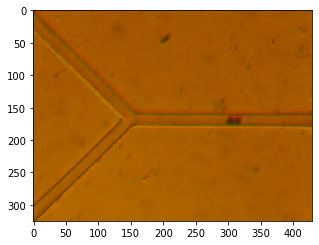

<Figure size 360x360 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

exp = 0
frame = 1000


plt.figure(figsize = (5,5))
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [5]:
video = as_gray(video)

In [6]:
def mean_frame(video):
    
    frames = video[0]
    for i in range(1, len(video), 1):

        frames = frames + video[i]
        
    mean = frames/len(video)
    
    return mean

In [7]:
def substraction(frame, mean):
    
    frame_sub = (mean.astype(np.int8)- video[frame].astype(np.int8))
    
    return frame_sub

In [8]:
mean = mean_frame(video)

Frame([[ 2,  1,  1, ..., -1,  0,  0],
       [ 0,  1,  0, ...,  0, -1,  1],
       [ 1,  1,  1, ...,  1,  1,  0],
       ...,
       [-1,  0,  0, ..., -2, -1,  0],
       [-3, -2, -1, ..., -2, -1,  0],
       [-4, -5, -3, ...,  0,  0,  0]], dtype=int8)
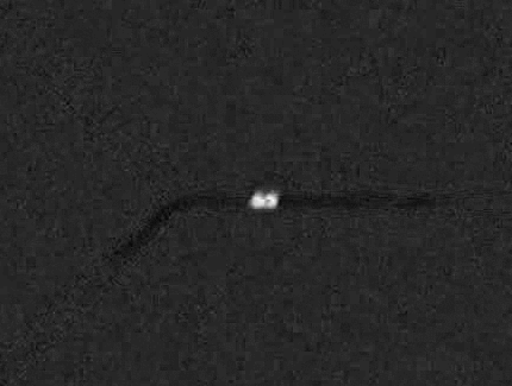

In [11]:
sub = substraction(2500, mean)
sub

In [17]:
diameter = 13
radius = diameter/2
radius

diameter = 2*radius

i = 0    

#@pipeline 
def locate(filename):

     return tp.locate(filename,2*round(radius)+1, threshold = 0,separation = diameter/2,minmass = 150, topn=2)
#     return tp.locate(filename,2*round(radius)+1, threshold = 5, noise_size = 5, separation = diameter/2, percentile = 20,
#                     characterize = False)


loc = locate(sub)
loc

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
301,168.188638,228.173510,1055.721010,3.609659,0.164709,20.534246,3491.0,0.012710,0
300,169.076348,215.915467,1154.806896,3.730098,0.028092,16.948902,3767.0,0.011815,0


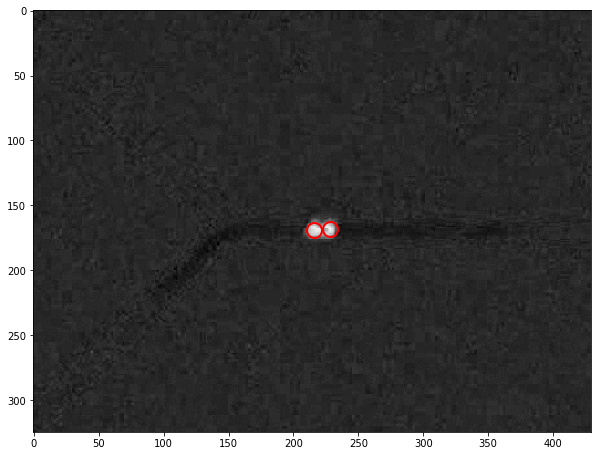

In [18]:
plt.figure(figsize=(10,10))
tp.annotate(loc, sub);

# Whole video

In [20]:
%%time
diameter = 13
radius = diameter/2
radius

loc_df = []
for i in range(0,len(video), 2): # Analyze 1 frame each 30 frame

    sub = substraction(i, mean)

    loc = tp.locate(sub,2*round(radius)+1,  threshold = 0 ,separation = diameter/2,minmass =  150, topn=2)
    
    loc['frame'] = i
    loc_df.append(loc.copy(deep = True))
    print(i)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

3514
3516
3518
3520
3522
3524
3526
3528
3530
3532
3534
3536
3538
3540
3542
3544
3546
3548
3550
3552
3554
3556
3558
3560
3562
3564
3566
3568
3570
3572
3574
3576
3578
3580
3582
3584
3586
3588
3590
3592
3594
3596
3598
3600
3602
3604
3606
3608
3610
3612
3614
3616
3618
3620
3622
3624
3626
3628
3630
3632
3634
3636
3638
3640
3642
3644
3646
3648
3650
3652
3654
3656
3658
3660
3662
3664
3666
3668
3670
3672
3674
3676
3678
3680
3682
3684
3686
3688
3690
3692
3694
3696
3698
3700
3702
3704
3706
3708
3710
3712
3714
3716
3718
3720
3722
3724
3726
3728
3730
3732
3734
3736
3738
3740
3742
3744
3746
3748
3750
3752
3754
3756
3758
3760
3762
3764
3766
3768
3770
3772
3774
3776
3778
3780
3782
3784
3786
3788
3790
3792
3794
3796
3798
3800
3802
3804
3806
3808
3810
3812
3814
3816
3818
3820
3822
3824
3826
3828
3830
3832
3834
3836
3838
3840
3842
3844
3846
3848
3850
3852
3854
3856
3858
3860
3862
3864
3866
3868
3870
3872
3874
3876
3878
3880
3882
3884
3886
3888
3890
3892
3894
3896
3898
3900
3902
3904
3906
3908
3910
3912


In [21]:
df = pd.concat(loc_df)

In [22]:
tracking = tp.link(df,10 , memory = 50, link_strategy ='recursive', neighbor_strategy= 'KDTree')

Frame 5045: 0 trajectories present.


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
tracking = tracking.set_index(["frame","particle"])

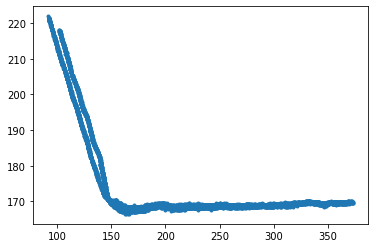

In [24]:
plt.plot(tracking.x, tracking.y,'.')